In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

removing last column as it contains nan values and id as it is irrelevent

In [5]:
data.drop(columns=['Unnamed: 32','id'],inplace=True)

<AxesSubplot:>

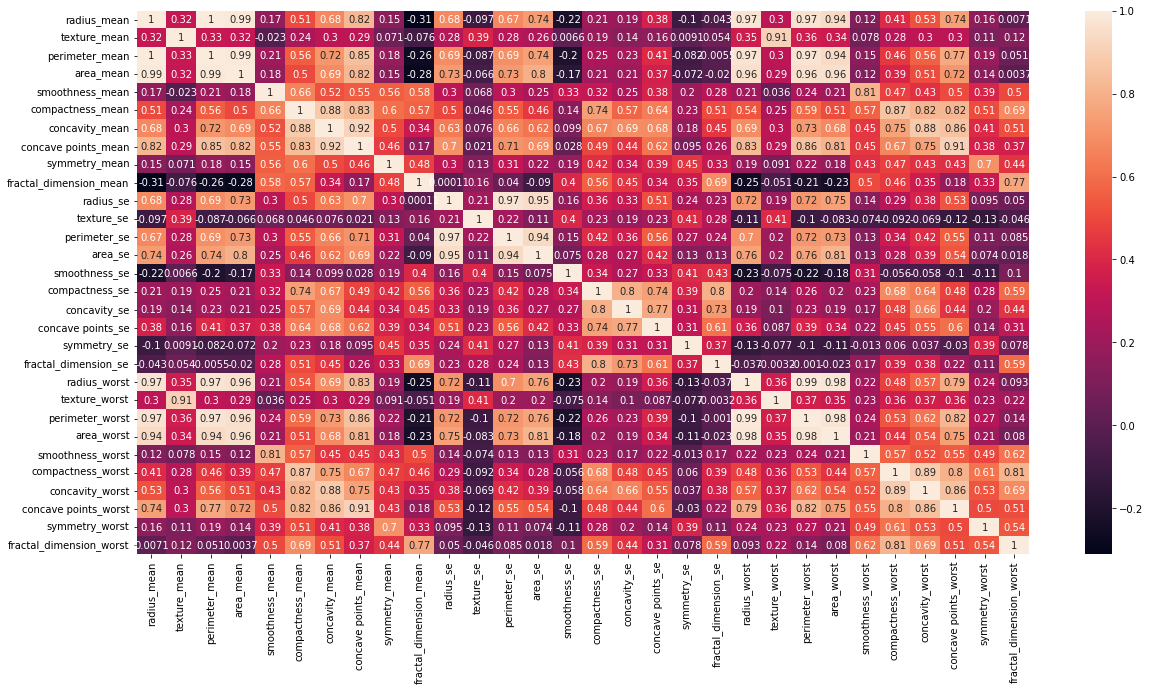

In [13]:
import seaborn as sns
fig,axes=plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,ax=axes)

A function to remove highly correlated features

In [14]:
corrmat=data.corr()

In [48]:
l=list()
for i in range(30):
    for j in range(i):
        if corrmat.iloc[i,j]>0.90:
            l.append(i)

In [50]:
l=set([i+1 for i in l]) #to accomodate for diagonosis

In [54]:
def get_cols(x):
    cols=[]
    for i in l:
        cols.append(x[i])
    return cols

In [55]:
corr_feat=get_cols(data.columns)

In [56]:
corr_feat

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [57]:
dataDrop=data.drop(columns=corr_feat)

C:\Users\Manish\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


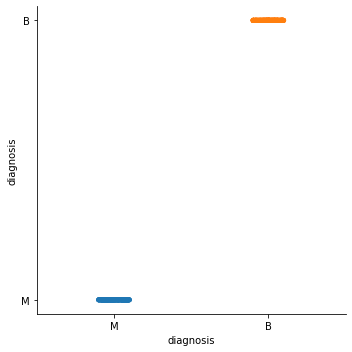

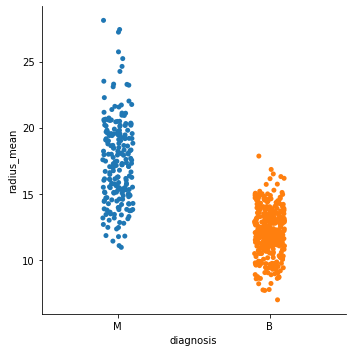

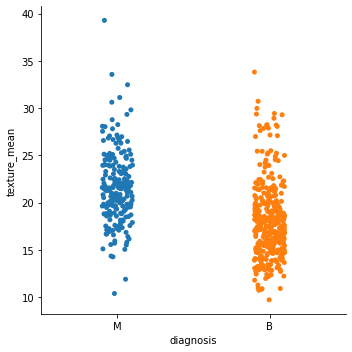

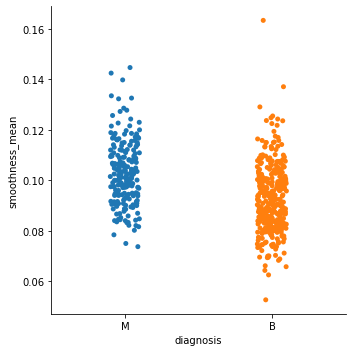

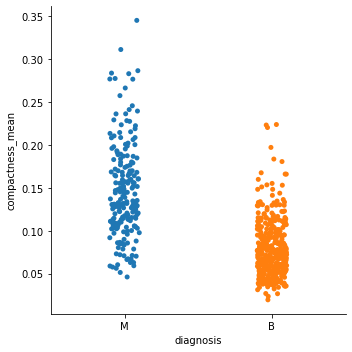

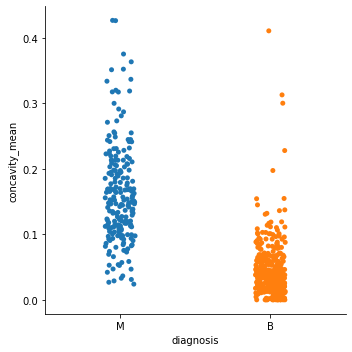

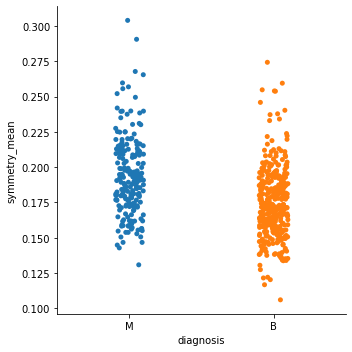

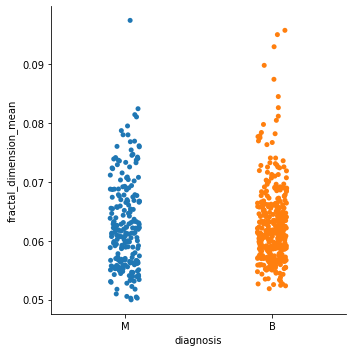

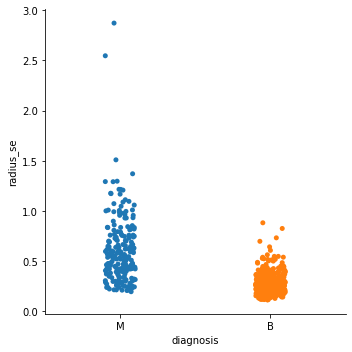

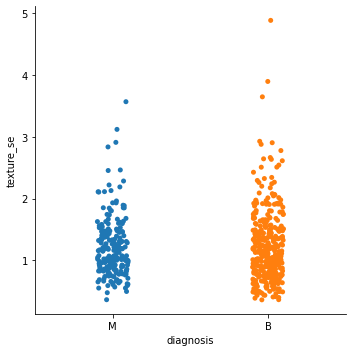

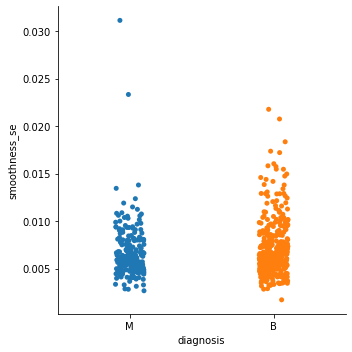

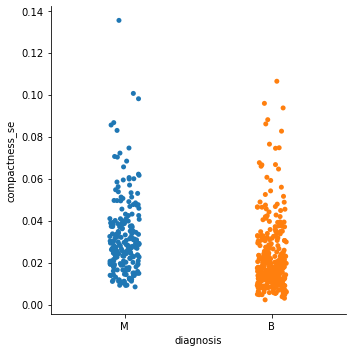

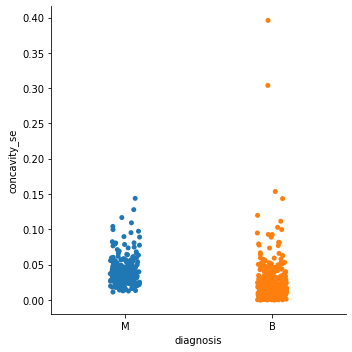

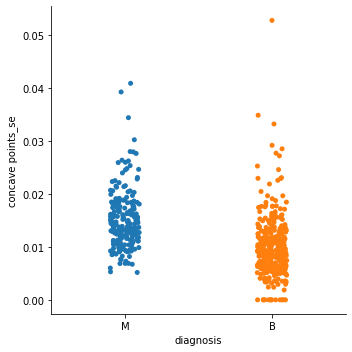

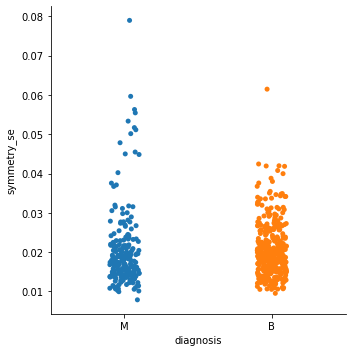

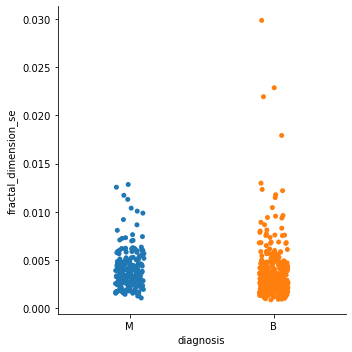

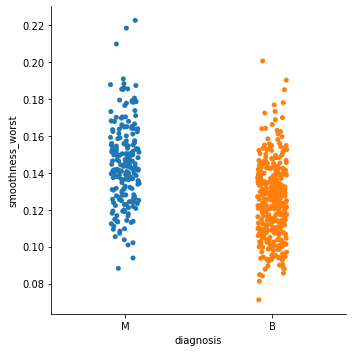

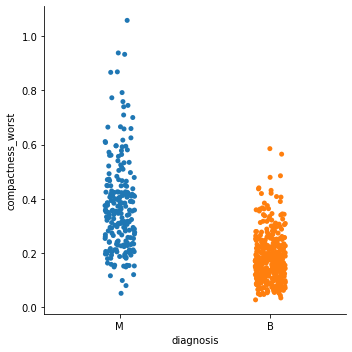

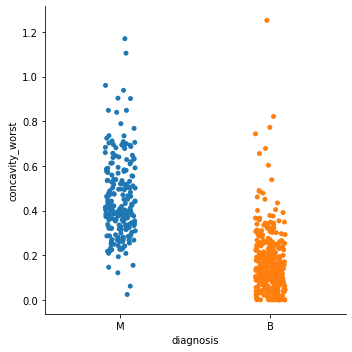

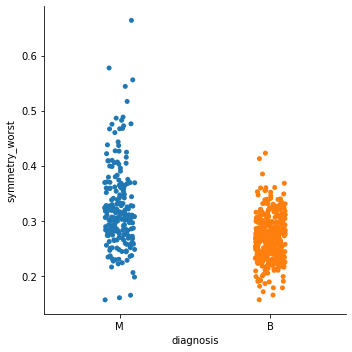

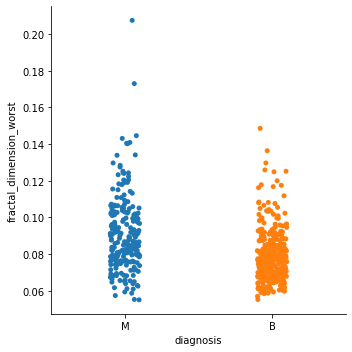

In [70]:
for i in dataDrop.columns:
    sns.catplot(y=i,x="diagnosis",data=dataDrop)

Check for Outliers 

<AxesSubplot:>

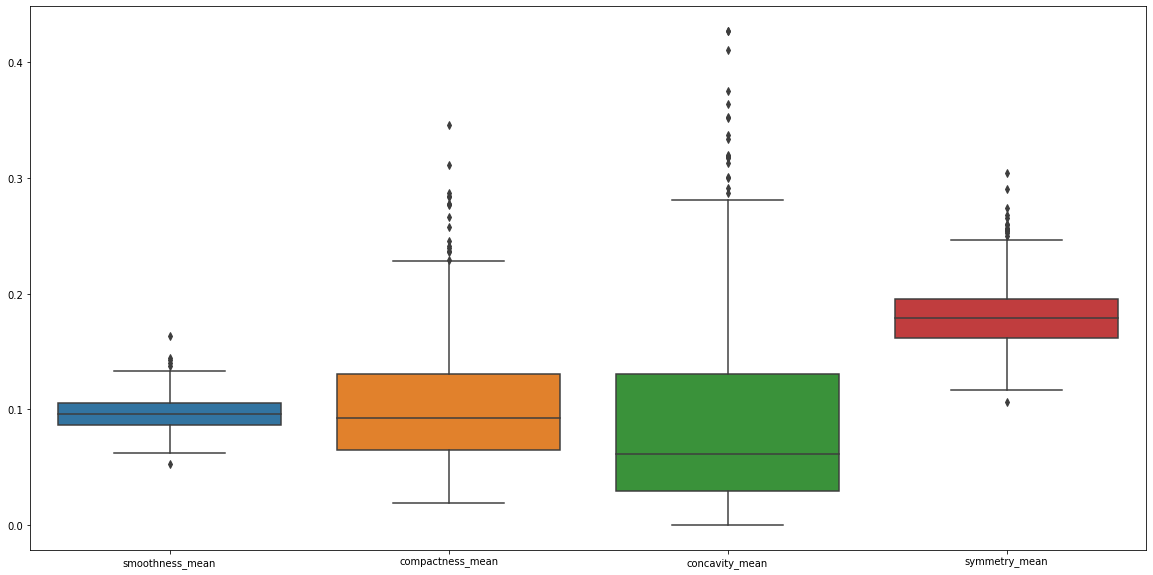

In [76]:
fig,axes=plt.subplots(figsize=(20,10))
sns.boxplot(data=dataDrop.iloc[:,3:7],ax=axes)

<AxesSubplot:>

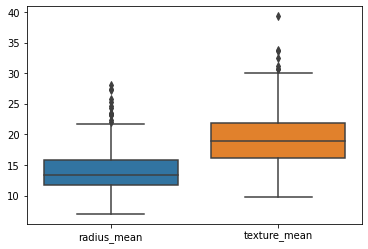

In [81]:
sns.boxplot(data=dataDrop.iloc[:,[1,2]])

<AxesSubplot:>

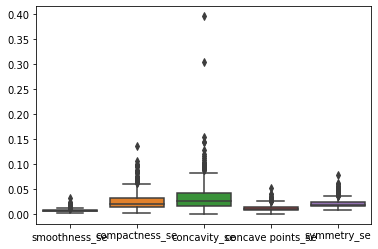

In [85]:
sns.boxplot(data=dataDrop.iloc[:,10:15])

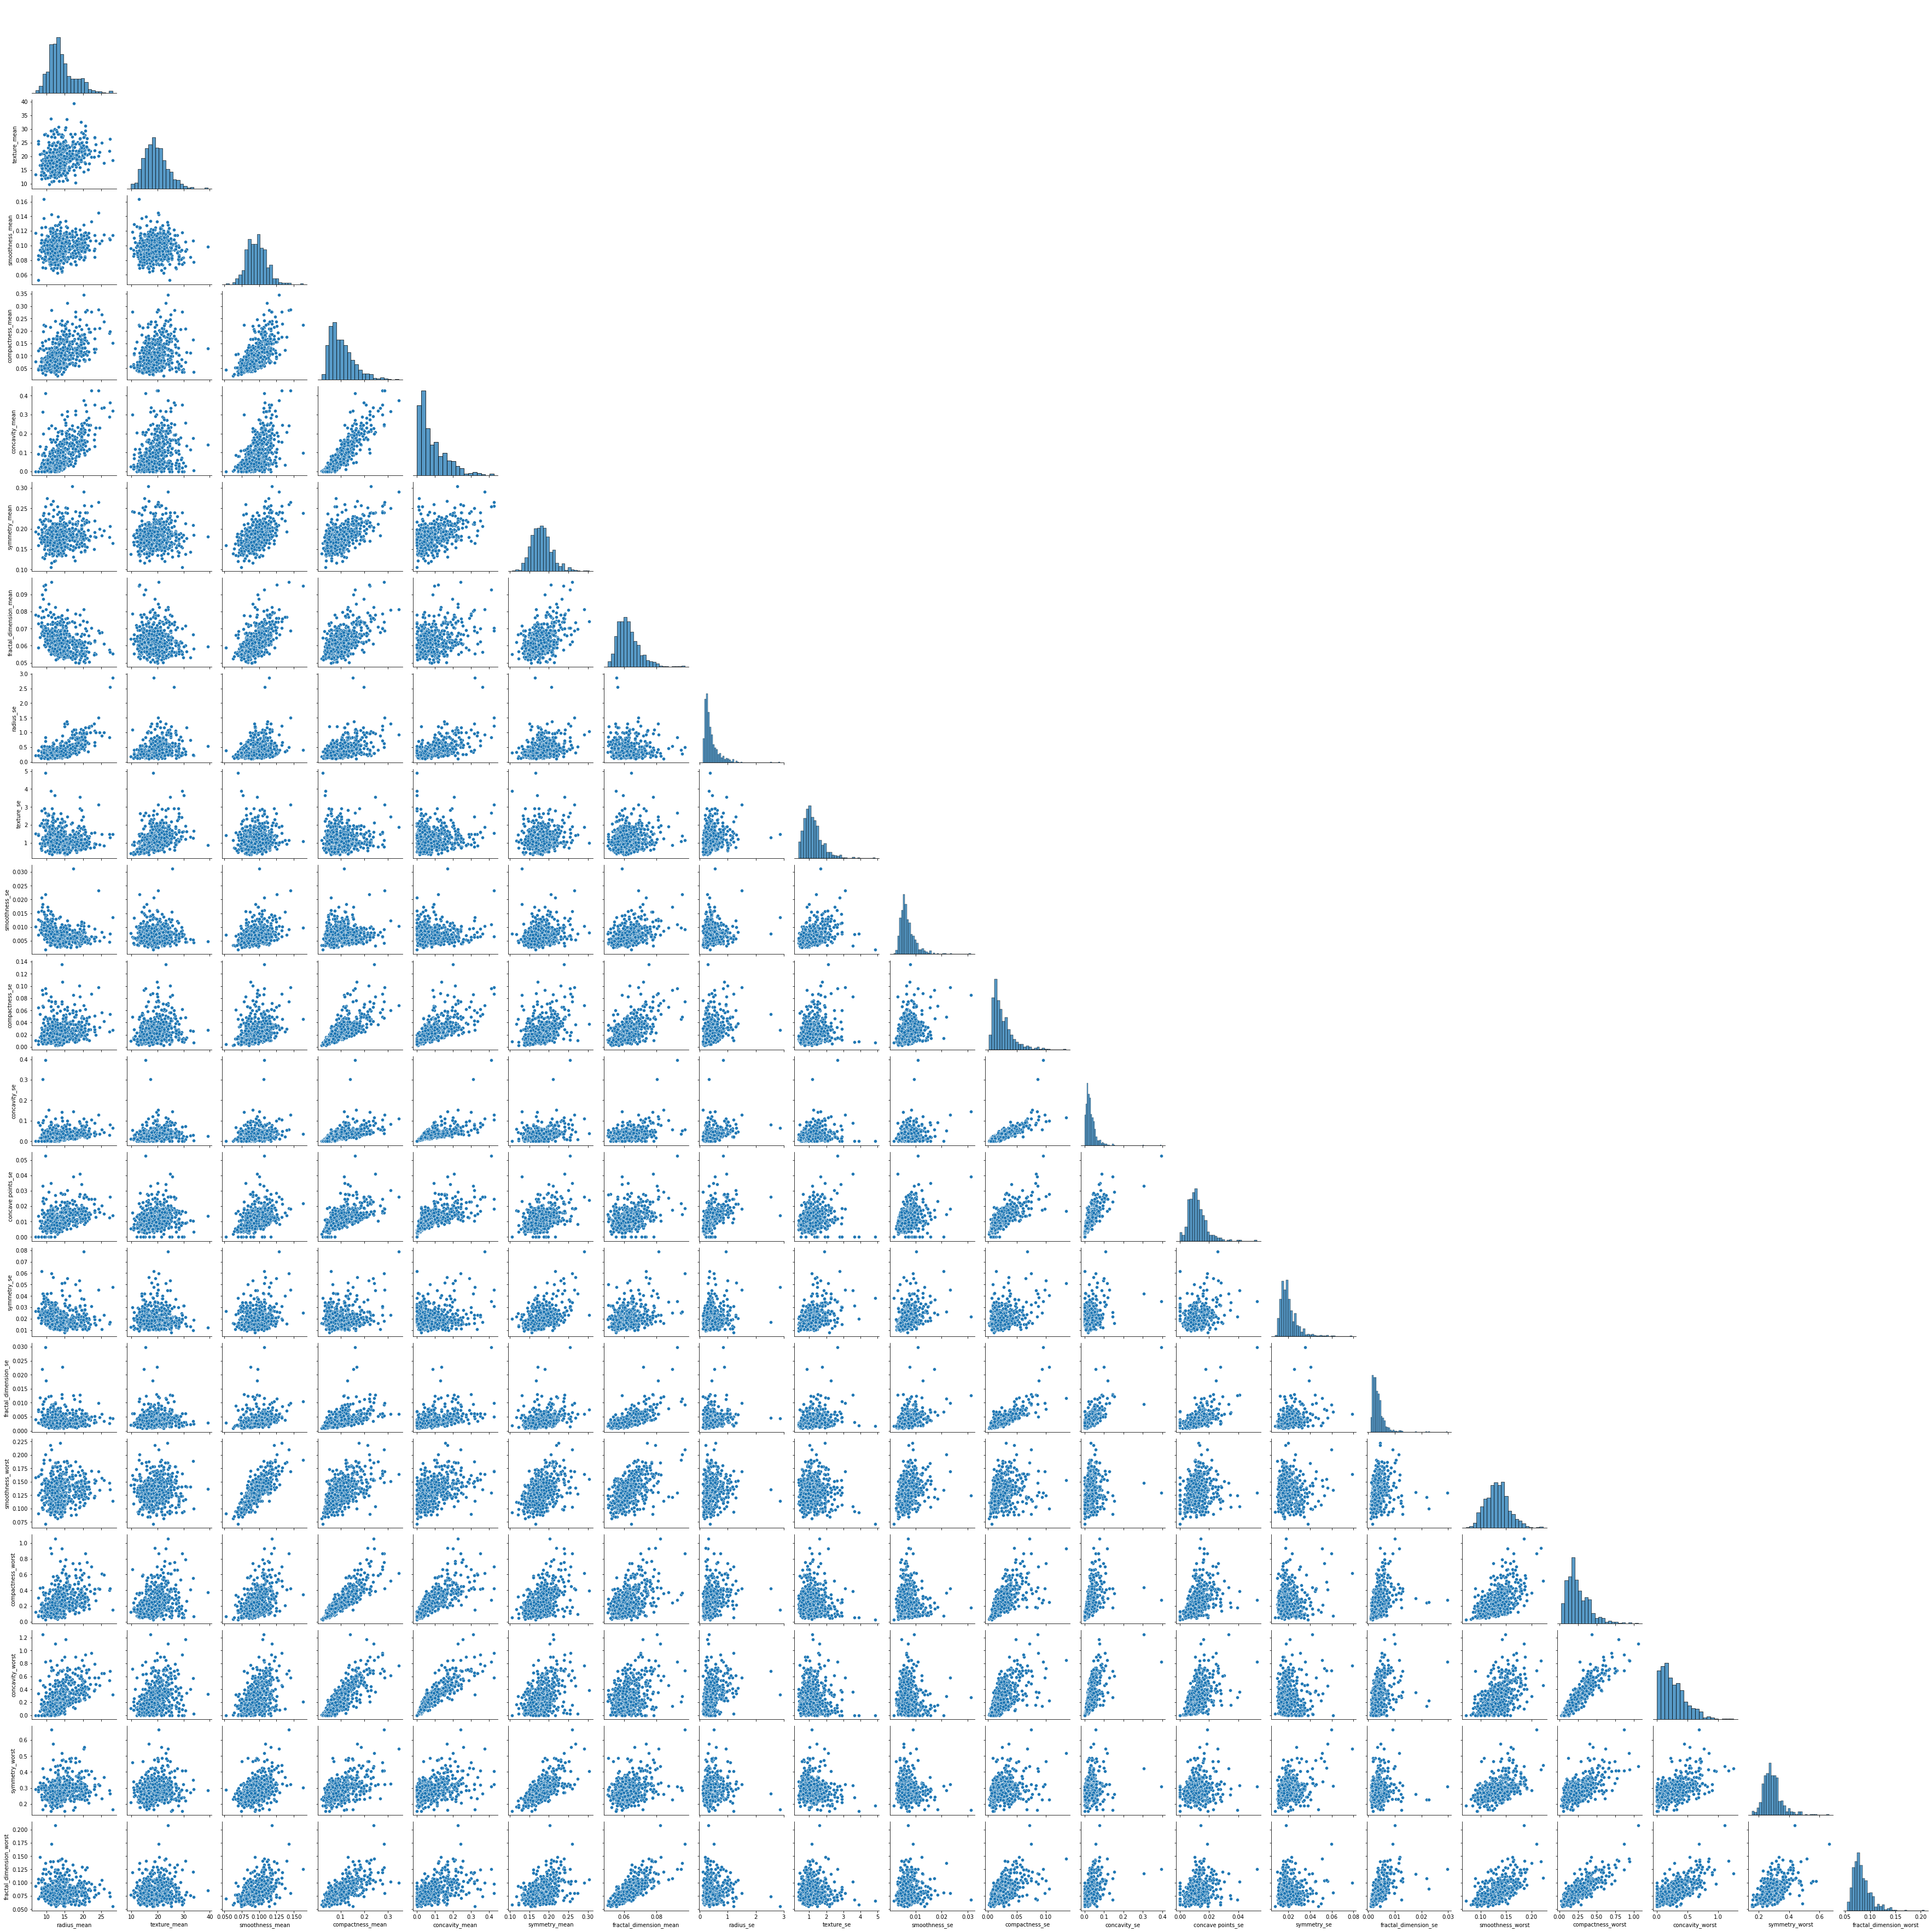

In [89]:
sns.pairplot(dataDrop.iloc[:,1:],corner=True)

presence of outlier detected so we will remove outliers

In [90]:
def removeOutlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    UQR=Q3+1.5*IQR
    LQR=Q1-1.5*IQR
    j=0
    for i in data.columns:
        data.loc[data[i]>UQR[j],i]=UQR[j]
        data.loc[data[i]<LQR[j],i]=LQR[j]
        j=j+1
    return data

In [107]:
dataNew=removeOutlier(dataDrop.iloc[:,1:])

# Training various models

In [123]:
target=data.iloc[:,0]
features=dataNew

In [124]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
featMinMax=MinMaxScaler().fit_transform(features)
featStd=StandardScaler().fit_transform(features)

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(featMinMax,target,test_size=0.3,stratify=target)

# KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [126]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [127]:
neigh.score(X_train,y_train)

0.9673366834170855

In [128]:
neigh.score(X_test,y_test)

0.9707602339181286

In [129]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test,neigh.predict(X_test))

array([[104,   3],
       [  2,  62]], dtype=int64)

accuracy of 93.47% on train data 97.07% on test data

# Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB as GNB
gnb=GNB()

In [131]:
gnb.fit(X_train,y_train)

GaussianNB()

In [132]:
gnb.score(X_train,y_train)

0.8994974874371859

In [133]:
gnb.score(X_test,y_test)

0.9181286549707602

accuracy of 89.94% on train data 91.81% on test data

# Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [140]:
lr.fit(X_train,y_train)

LogisticRegression()

In [141]:
lr.score(X_train,y_train)

0.9698492462311558

In [142]:
lr.score(X_test,y_test)

0.9532163742690059

accuracy of 96.98% on train data 95.32% on test data

# Support Vector Machine

In [144]:
from sklearn import svm
clf = svm.SVC()

In [145]:
clf.fit(X_train,y_train)

SVC()

In [146]:
clf.score(X_train,y_train)

0.9798994974874372

In [147]:
clf.score(X_test,y_test)

0.9883040935672515

accuracy of 97.99% on train data 98.83% on test data